**XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.**

**Data Set:

**You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

**Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv – this file includes details of transaction for 2 cab companies

**Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv – this file contains list of US cities, their population and number of cab users

**First of all we joined all of dataset in SQL Management Studio to analysis dataset in Jupyter Notebook**

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [222]:
df1=pd.read_csv(r"C:\Users\Lenovo\Desktop\İntership Projects\Second Week\Final Data.csv")
df1.head(2)

,Transaction ID,Date of Travel,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Customer_ID,Gender,Age,Income (USD/Month)
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,814885.0,24701.0,30.450001,370.950012,313.635010,Card,29290,Male,28.0,10813.0
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,814885.0,24701.0,28.620001,358.519989,334.854004,Card,27703,Male,27.0,9237.0


In [223]:
# Let's convert the 'Date of Travel' column to datetime format
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'], unit='D', origin='1900-01-01')

In [224]:
df1.head()

,Transaction ID,Date of Travel,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Customer_ID,Gender,Age,Income (USD/Month)
0,10000011.0,2016-01-10,Pink Cab,ATLANTA GA,814885.0,24701.0,30.450001,370.950012,313.635010,Card,29290,Male,28.0,10813.0
1,10000012.0,2016-01-08,Pink Cab,ATLANTA GA,814885.0,24701.0,28.620001,358.519989,334.854004,Card,27703,Male,27.0,9237.0
2,10000013.0,2016-01-04,Pink Cab,ATLANTA GA,814885.0,24701.0,9.040000,125.199997,97.632004,Cash,28712,Male,53.0,11242.0
3,10000014.0,2016-01-09,Pink Cab,ATLANTA GA,814885.0,24701.0,33.169998,377.399994,351.601990,Cash,28020,Male,23.0,23327.0
4,10000015.0,2016-01-05,Pink Cab,ATLANTA GA,814885.0,24701.0,8.730000,114.620003,97.776001,Card,27182,Male,33.0,8536.0


In [225]:
#Let's 'date of travel' separates to year and months and then delete date of travel

df1['Travel by Months'] = df1['Date of Travel'].dt.strftime('%B')
df1['Travel by Years'] = df1['Date of Travel'].dt.strftime('%Y')
df1.drop('Date of Travel', axis =1,inplace =True)

In [226]:
df1 = df1.reindex(columns=['Travel by Months', 'Travel by Years', 'Company', 'City','Population','Users', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Payment_Mode','Customer_ID', 'Gender', 'Age', 'Income (USD/Month)'])


In [227]:
df1.head(2)

,Travel by Months,Travel by Years,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Customer_ID,Gender,Age,Income (USD/Month)
0,January,2016,Pink Cab,ATLANTA GA,814885.0,24701.0,30.450001,370.950012,313.635010,Card,29290,Male,28.0,10813.0
1,January,2016,Pink Cab,ATLANTA GA,814885.0,24701.0,28.620001,358.519989,334.854004,Card,27703,Male,27.0,9237.0


In [228]:
df1.groupby('Travel by Years')['Travel by Months'].value_counts()

Travel by Years  Travel by Months
2016             December            13765
                 November            13008
                 October             12644
                 September           10821
                 August               9844
                 July                 8247
                 May                  7863
                 June                 7325
                 March                6594
                 April                6230
                 February             5881
                 January              4017
2017             December            16654
                 October             15358
                 November            14972
                 September           12655
                 August              11576
                 July                 9834
                 January              9050
                 May                  8606
                 June                 8108
                 April                7981
                 Mar

**Let's drop year (2019) because it just cover the month of january..This makes us not to get a correct result when we do analaysis**



In [229]:
df1.drop(df1[df1['Travel by Years'] == '2019'].index, inplace=True)

In [230]:
df1['Travel by Years'].unique()

array(['2016', '2017', '2018', nan], dtype=object)

In [231]:
df1.isnull().sum()

Travel by Months      80706
Travel by Years       80706
Company               80706
City                  80706
Population            80706
Users                 80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Payment_Mode          80706
Customer_ID               0
Gender                80706
Age                   80706
Income (USD/Month)    80706
dtype: int64

In [232]:
#Let's fill null values in some columns which will affect our analysis
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Company'].fillna(df1['Company'].mode()[0], inplace=True)
df1['Population'].fillna(df1['Population'].median(), inplace=True)
df1['Users'].fillna(df1['Users'].median(), inplace=True)
df1['KM Travelled'].fillna(df1['KM Travelled'].median(), inplace=True)
df1['Price Charged'].fillna(df1['Price Charged'].median(), inplace=True)
df1['Cost of Trip'].fillna(df1['Cost of Trip'].median(), inplace=True)
df1['Income (USD/Month)'].fillna(df1['Income (USD/Month)'].median(), inplace=True)

In [233]:
df1.isnull().sum()

Travel by Months      80706
Travel by Years       80706
Company                   0
City                  80706
Population                0
Users                     0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Payment_Mode          80706
Customer_ID               0
Gender                80706
Age                       0
Income (USD/Month)        0
dtype: int64

In [234]:
df1.shape

(439585, 14)

In [235]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439585 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Travel by Months    358879 non-null  object 
 1   Travel by Years     358879 non-null  object 
 2   Company             439585 non-null  object 
 3   City                358879 non-null  object 
 4   Population          439585 non-null  float64
 5   Users               439585 non-null  float64
 6   KM Travelled        439585 non-null  float64
 7   Price Charged       439585 non-null  float64
 8   Cost of Trip        439585 non-null  float64
 9   Payment_Mode        358879 non-null  object 
 10  Customer_ID         439585 non-null  int64  
 11  Gender              358879 non-null  object 
 12  Age                 439585 non-null  float64
 13  Income (USD/Month)  439585 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 50.3+ MB


In [236]:
df1.describe()

,Population,Users,KM Travelled,Price Charged,Cost of Trip,Customer_ID,Age,Income (USD/Month)
count,4.395850e+05,439585.000000,439585.000000,439585.000000,439585.000000,439585.000000,439585.000000,439585.000000
mean,2.849996e+06,155755.024823,22.543734,416.694653,285.505366,23617.602457,34.907379,14982.341693
std,3.054017e+06,91287.707771,11.053277,248.384522,142.755836,21194.835235,11.415470,7202.413285
min,2.489680e+05,3643.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,9.429080e+05,80021.000000,14.400000,246.690002,180.503998,3529.000000,27.000000,9810.000000
50%,1.595037e+06,144132.000000,22.440001,386.399994,282.480011,15150.000000,33.000000,14685.000000
75%,1.955130e+06,164468.000000,30.520000,533.630005,383.670013,43884.000000,39.000000,19594.000000
max,8.405837e+06,302149.000000,48.000000,2048.030029,691.200012,60000.000000,65.000000,35000.000000


**Let's set up some hypothesis to show some information about companies**

**1.Pricing strategies of Pink Cab is higher than Yellow Cab**

In [237]:
df1[df1['Company'] == 'Pink Cab']['Price Charged'].mean()

310.7738544386425

In [238]:
df1[df1['Company'] == 'Pink Cab']['Cost of Trip'].mean()

248.13729399877693

In [239]:
df1[df1['Company'] == 'Yellow Cab']['Price Charged'].mean()

441.936581614404

In [240]:
df1[df1['Company'] == 'Yellow Cab']['Cost of Trip'].mean()

294.4105309859304

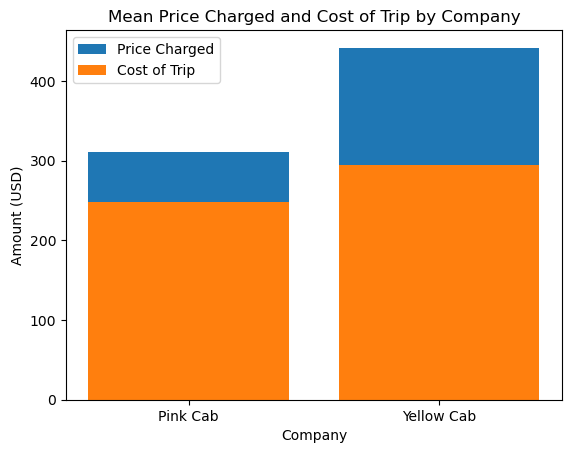

In [241]:
pink_mean_price = df1[df1['Company'] == 'Pink Cab']['Price Charged'].mean()
pink_mean_cost = df1[df1['Company'] == 'Pink Cab']['Cost of Trip'].mean()
yellow_mean_price = df1[df1['Company'] == 'Yellow Cab']['Price Charged'].mean()
yellow_mean_cost = df1[df1['Company'] == 'Yellow Cab']['Cost of Trip'].mean()

fig, ax = plt.subplots()
ax.bar(['Pink Cab', 'Yellow Cab'], [pink_mean_price, yellow_mean_price], label='Price Charged')
ax.bar(['Pink Cab', 'Yellow Cab'], [pink_mean_cost, yellow_mean_cost], label='Cost of Trip')
ax.set_xlabel('Company')
ax.set_ylabel('Amount (USD)')
ax.set_title('Mean Price Charged and Cost of Trip by Company')
ax.legend()
plt.show()

**Pink Cab:
On average, Pink Cab charges approximately 310.77 for a trip.
The cost of providing a trip is lower than the average price charged, at approximately 248.14.
This may suggest that Pink Cab has a profitable business model with a reasonable profit margin.**

**Yellow Cab:
On average, Yellow Cab charges approximately 458.28 for a trip.
The cost of providing a trip  is lower than the average price charged, at approximately 297.92.
This may suggest that Yellow Cab has a relatively higher profit margin than Pink Cab.**

**2.Card payment models are more popular**

In [242]:
payment_mode_counts = df1['Payment_Mode'].value_counts()
print(payment_mode_counts)

Card    215187
Cash    143692
Name: Payment_Mode, dtype: int64


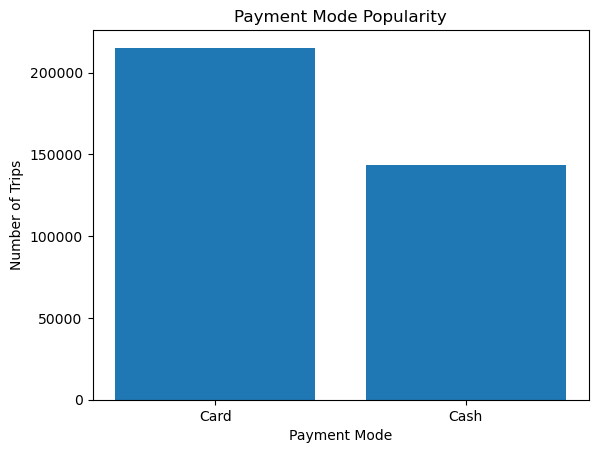

In [243]:
labels = ['Card', 'Cash']
values = [215187, 143692]

plt.bar(labels, values)

plt.title('Payment Mode Popularity')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Trips')
plt.show()

**It seems that the Card payment model is more popular, as it has a higher count than the Cash payment model.**

**3.Card payment mode is higher than cash payment model for each company**

In [244]:
df1.groupby('Company')['Payment_Mode'].value_counts()

Company     Payment_Mode
Pink Cab    Card             50647
            Cash             33950
Yellow Cab  Card            164540
            Cash            109742
Name: Payment_Mode, dtype: int64

In [245]:
# calculate the total number of trips for each company
total_trips_by_company = df1.groupby('Company')['Payment_Mode'].count()

# calculate the frequency of each payment mode for each company
payment_mode_freq_by_company = df1.groupby(['Company', 'Payment_Mode'])['Payment_Mode'].count()

# calculate the percentage of trips made with each payment mode for each company
payment_mode_percentage_by_company = payment_mode_freq_by_company / total_trips_by_company * 100

# print the results
print(payment_mode_percentage_by_company)

Company     Payment_Mode
Pink Cab    Card            59.868553
            Cash            40.131447
Yellow Cab  Card            59.989354
            Cash            40.010646
Name: Payment_Mode, dtype: float64


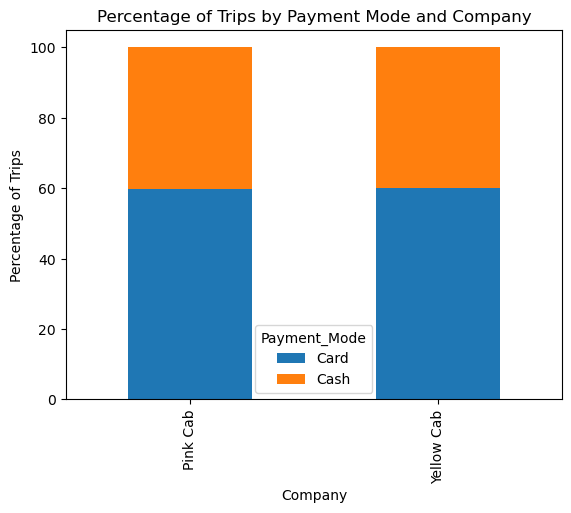

In [246]:
payment_mode_percentage_by_company.unstack().plot(kind='bar', stacked=True)

plt.title('Percentage of Trips by Payment Mode and Company')
plt.xlabel('Company')
plt.ylabel('Percentage of Trips')

plt.show()

**It seems that both Pink Cab and Yellow Cab have a similar distribution of payment modes, with slightly more customers paying with Card than Cash.**

**4.The cost of a trip varies according to the city in which it is made.**

In [247]:
df1.groupby('City')['Price Charged'].mean()

City
ATLANTA GA        394.510533
AUSTIN TX         383.575594
BOSTON MA         348.887449
CHICAGO IL        350.458856
DALLAS TX         447.861727
DENVER CO         382.281461
LOS ANGELES CA    370.484666
MIAMI FL          399.880713
NASHVILLE TN      318.457147
NEW YORK NY       570.380374
ORANGE COUNTY     390.585170
PHOENIX AZ        366.632508
PITTSBURGH PA     337.434393
SACRAMENTO CA     321.646244
SAN DIEGO CA      348.283468
SEATTLE WA        356.879091
SILICON VALLEY    432.391875
TUCSON AZ         348.490156
WASHINGTON DC     374.233305
Name: Price Charged, dtype: float64

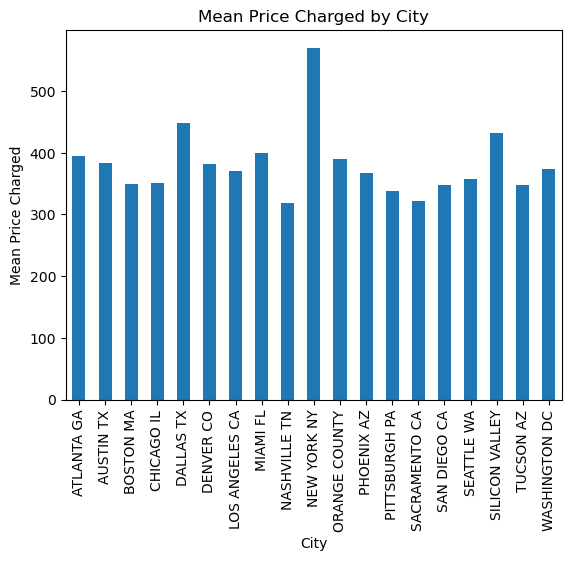

In [248]:
# Group the dataframe by City and calculate the mean price charged
mean_price_by_city = df1.groupby('City')['Price Charged'].mean()

# Plot the mean price for each city as a bar chart
mean_price_by_city.plot(kind='bar')

# Set the title, x-label, and y-label
plt.title('Mean Price Charged by City')
plt.xlabel('City')
plt.ylabel('Mean Price Charged')

# Display the plot
plt.show()


**It appears that the cost of a trip varies according to the city in which it is made.**

**5.There is an annual increase in the pricing of taxi companies according to the years.**

In [249]:
df1.groupby(['Travel by Years', 'Company'])['Price Charged'].mean()

Travel by Years  Company   
2016             Pink Cab      314.683129
                 Yellow Cab    467.923678
2017             Pink Cab      316.064125
                 Yellow Cab    466.806063
2018             Pink Cab      302.035164
                 Yellow Cab    441.137294
Name: Price Charged, dtype: float64

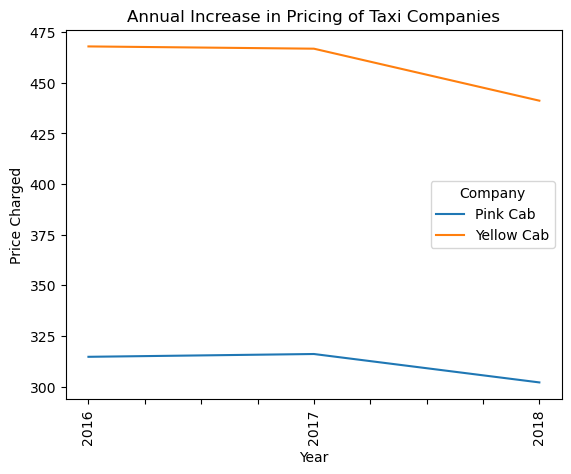

In [250]:
# create a pivot table with the years as index and companies as columns
pivot_table = df1.pivot_table(index='Travel by Years', columns='Company', values='Price Charged')

# plot the pivot table as a line chart
pivot_table.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Price Charged')

plt.title('Annual Increase in Pricing of Taxi Companies')
plt.xticks(rotation=90)
plt.show()

**Both Pink Cab and Yellow Cab show a decrease in their average price charged per trip over the years.**

**6.Companies have different pricing strategies for each quarter of the year.**

In [251]:
df1['Travel by Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', nan],
      dtype=object)

In [252]:
First_Quarter = df1[df1['Travel by Months'].isin(['January', 'February', 'March'])]
Second_Quarter = df1[df1['Travel by Months'].isin(['April', 'May', 'June'])]
Third_Quarter = df1[df1['Travel by Months'].isin(['July', 'August', 'September'])]
Fourth_Quarter = df1[df1['Travel by Months'].isin(['October', 'November', 'December'])]

In [253]:
First_Quarter.groupby('Company')['Price Charged'].mean()

Company
Pink Cab      324.819359
Yellow Cab    486.107105
Name: Price Charged, dtype: float64

In [254]:
Second_Quarter.groupby('Company')['Price Charged'].mean()

Company
Pink Cab      293.199166
Yellow Cab    491.855183
Name: Price Charged, dtype: float64

In [255]:
Third_Quarter.groupby('Company')['Price Charged'].mean()

Company
Pink Cab      296.297357
Yellow Cab    434.561171
Name: Price Charged, dtype: float64

In [256]:
Fourth_Quarter.groupby('Company')['Price Charged'].mean()

Company
Pink Cab      323.480436
Yellow Cab    442.413437
Name: Price Charged, dtype: float64

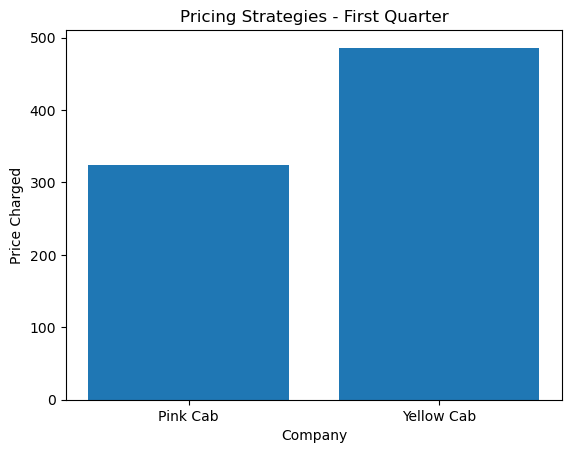

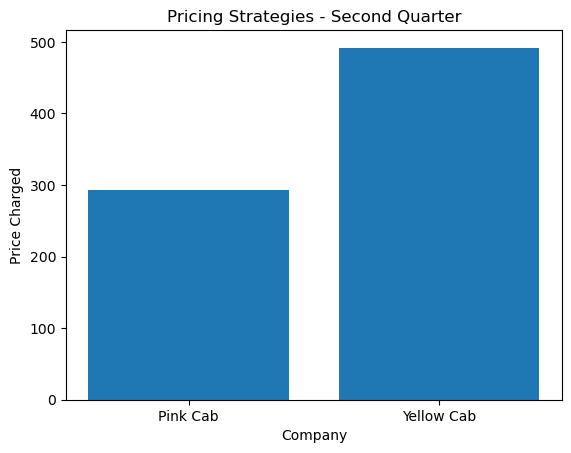

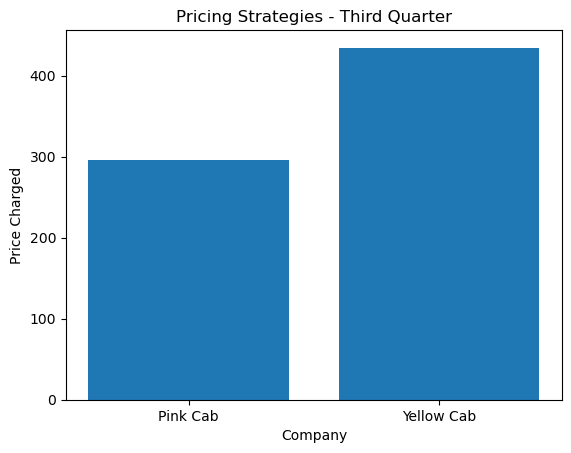

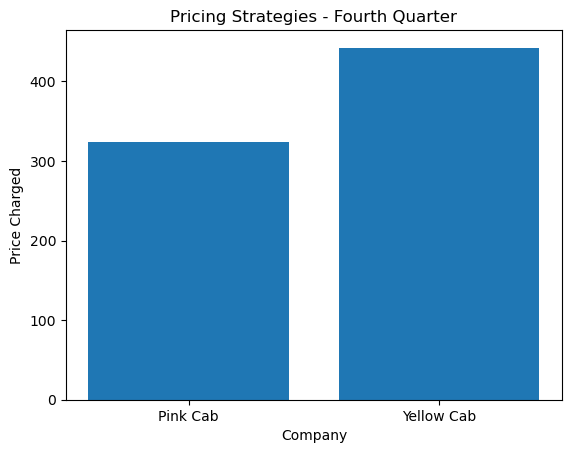

In [257]:
# Define the data for each quarter
q1_data = [324.819359, 486.107105]
q2_data = [293.199166, 491.855183]
q3_data = [296.297357, 434.561171]
q4_data = [323.480436, 442.413437]

# Define the x-axis labels
x_labels = ['Pink Cab', 'Yellow Cab']

# Create a bar plot for each quarter
plt.bar(x_labels, q1_data)
plt.title('Pricing Strategies - First Quarter')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.show()

plt.bar(x_labels, q2_data)
plt.title('Pricing Strategies - Second Quarter')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.show()

plt.bar(x_labels, q3_data)
plt.title('Pricing Strategies - Third Quarter')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.show()

plt.bar(x_labels, q4_data)
plt.title('Pricing Strategies - Fourth Quarter')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.show()

**It appears that the pricing strategies of the companies vary by quarter of the year. Yellow Cab generally has a higher average price charged compared to Pink Cab in each quarter. The average price charged by both Pink Cab and Yellow Cab is lowest in the second quarter of the year and highest in the fourth quarter.**

**Yellow Cab has more customers than Pink Cab over the years**

In [258]:
df1.groupby(['Travel by Years','Company'])['Customer_ID'].size()

Travel by Years  Company   
2016             Pink Cab      24840
                 Yellow Cab    81399
2017             Pink Cab      30301
                 Yellow Cab    98212
2018             Pink Cab      29456
                 Yellow Cab    94671
Name: Customer_ID, dtype: int64

**We clearly see that Yellow Cab has at least 3 times more customers than Pink Cab between 2016 and 2018**

**Areas to investigate:**

**1.Which company has maximum cab users at a particular time (2017) period?**

In [259]:
df1[df1['Travel by Years'] == '2017'].groupby('Company')['Customer_ID'].size()

Company
Pink Cab      30301
Yellow Cab    98212
Name: Customer_ID, dtype: int64

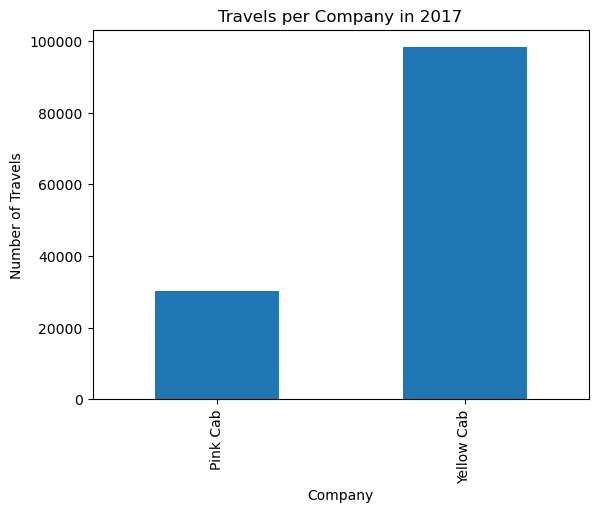

In [260]:
travel_counts = df1[df1['Travel by Years'] == '2017'].groupby('Company')['Customer_ID'].size()

travel_counts.plot(kind='bar', xlabel='Company', ylabel='Number of Travels', title='Travels per Company in 2017')

plt.show()

**2.Does margin proportionally increase with increase in number of customers?**

In [261]:
df2 = df1.groupby(['Travel by Months', 'Travel by Years', 'Company'])['Customer_ID', 'Price Charged', 'Cost of Trip'].agg({'Customer_ID': 'nunique', 'Price Charged': 'sum', 'Cost of Trip': 'sum'})
df2['Margin'] = df2['Price Charged'] - df2['Cost of Trip']

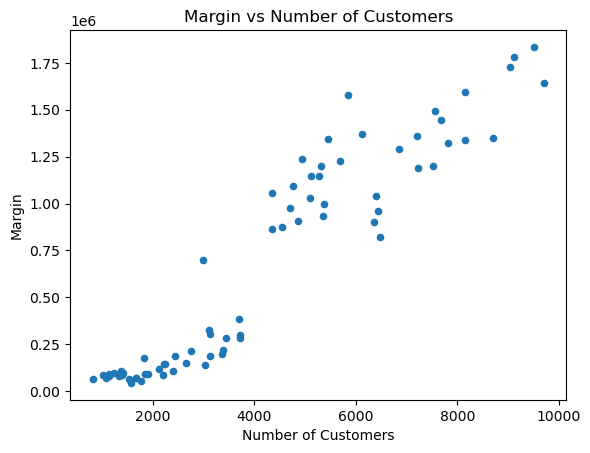

In [262]:
df2.plot.scatter(x='Customer_ID', y='Margin')
plt.xlabel('Number of Customers')
plt.ylabel('Margin')
plt.title('Margin vs Number of Customers')
plt.show()

**We clearly see in graph that margin proportionally increase when number of customers expand**

**3.What are the attributes of these customer segments?**

In [263]:
df1.groupby('Company').agg({'Age': 'mean', 'Income (USD/Month)': 'mean',
                                                   'KM Travelled': 'mean','Price Charged' : 'mean',
                                                  'Cost of Trip' : 'mean'})

,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
Company,,,,,
Pink Cab,35.322671,15058.557549,22.559057,310.773854,248.137294
Yellow Cab,34.808410,14964.178733,22.540083,441.936582,294.410531


**In conclusion, we can say the following.**

1.Yellow Cab Taxi Company's average price charged and cost of trip is higher than Pink Cab.

2.Customers prefer to card payment model rather than cash.

3.There is a slow decrease in the price of taxi companies between 2016 and 2018.

4.Companies have a different pricing strategy for each quarter of the year.

5.Yellow Cab has more customers than Pink Cab


**Based on these data, we can say that the Yellow Cab offers more advantages for investment.**
